<a href="https://colab.research.google.com/github/mekabuko/DS_TIL/blob/main/Aidemy_Option/17_%E7%94%B7%E5%A5%B3%E8%AD%98%E5%88%A5_%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92%E7%99%BA%E5%B1%95/17_%E7%94%B7%E5%A5%B3%E8%AD%98%E5%88%A5_2_1_3_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aidemy １7. 男女識別
## 2.1.3 転移学習　サンプルコード
- VGGを転移元として、オリジナルのモデルを定義、実行

### ライブラリ

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical


### データの取り込み

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### 今回は一部だけを使用

In [4]:
# 1000 枚だけ使います
X_train = X_train[:1000]
X_test = X_test[:1000]
# 正解ラベルも、1000枚分
y_train = to_categorical(y_train)[:1000]
y_test = to_categorical(y_test)[:1000]

### 転移元(VGG16)を定義

In [5]:
input_tensor = Input(shape=(32, 32, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

###  転移先を定義

In [12]:
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(rate=0.5)) # ドロップアウトの追加
top_model.add(Dense(10, activation='softmax'))

### 連結

In [13]:
model = Model(inputs=vgg16.input, outputs=top_model(vgg16.output))

### 転移元の部分は重みを固定

In [14]:
for layer in model.layers[:19]: # 19層目までがVGG
    layer.trainable = False

### コンパイル

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

### モデルの要約

In [16]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

### 学習

In [17]:
#学習過程の取得
history = model.fit(X_train, y_train, batch_size=100, epochs=1, validation_data=(X_test, y_test))

10/10 [==============================] - 21s 2s/step - loss: 33.2072 - accuracy: 0.1020 - val_loss: 15.9514 - val_accuracy: 0.1400


### 予測

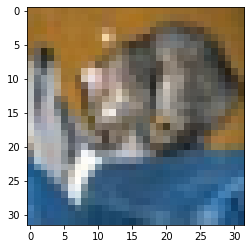

9


In [18]:
for i in range(1):
    x = X_test[i]
    plt.imshow(x)
    plt.show()
    pred = np.argmax(model.predict(x.reshape(1,32,32,3)))
    print(pred)